ПИм-231 Давыдов лаба 15

1. Загрузите выборку Wine по адресу https://archive.ics.uci.edu/ml/machinelearning-databases/wine/wine.data
2. Извлеките из данных признаки и классы. Класс записан в первом
столбце (три варианта), признаки — в столбцах со второго по последний. Более подробно о сути признаков можно прочитать по адресу https://archive.ics.uci.edu/ml/datasets/Wine (см. также файл
wine.names, приложенный к заданию)
3. Оценку качества необходимо провести методом кросс-валидации по
5 блокам (5-fold). Создайте генератор разбиений, который перемешивает выборку перед формированием блоков (shuffle=True). Для
воспроизводимости результата, создавайте генератор KFold с фиксированным параметром random_state=42. В качестве меры качества используйте долю верных ответов (accuracy).
4. Найдите точность классификации на кросс-валидации для метода
k ближайших соседей (sklearn.neighbors.KNeighborsClassifier), при
k от 1 до 50. При каком k получилось оптимальное качество? Чему
оно равно (число в интервале от 0 до 1)? Данные результаты и
будут ответами на вопросы 1 и 2.
5. Произведите масштабирование признаков с помощью функции
sklearn.preprocessing.scale. Снова найдите оптимальное k на кроссвалидации.
6. Какое значение k получилось оптимальным после приведения признаков к одному масштабу? Как изменилось значение качества?
Приведите ответы на вопросы 3 и 4.

Постройте график зависимости оценки точности модели от количества соседей. Возьмите датасет из предыдущего задания (наличие диабета у женщин), определите оптимальное количество соседей в методе KNN, сравните оба метода (SVM, KNN), используя classification_report.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

1. Загрузите выборку Wine

In [ ]:
data = pd.read_csv("wine.data", header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


2. Извлеките из данных признаки и классы. Класс записан в первом столбце (три варианта), признаки — в столбцах со второго по последний.

In [ ]:
X = data.drop(0, axis = 1)
y = data[0]
y.value_counts()

2    71
1    59
3    48
Name: 0, dtype: int64

3. Создайте генератор разбиений, который перемешивает выборку перед формированием блоков (shuffle=True). Для воспроизводимости результата, создавайте генератор KFold с фиксированным параметром random_state=42. В качестве меры качества используйте долю верных ответов (accuracy).

In [ ]:
kf = KFold(5, shuffle=True, random_state=42)

4. Найдите точность классификации на кросс-валидации для метода k ближайших соседей (sklearn.neighbors.KNeighborsClassifier), при k от 1 до 50. При каком k получилось оптимальное качество? Чему оно равно (число в интервале от 0 до 1)? Данные результаты и будут ответами на вопросы 1 и 2.

In [ ]:
def knn(k, X, y): # сделал функцию с классификатором
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(X, y)
  accuracy = np.mean(cross_val_score(neigh, X, y, cv = kf)) #точность
  return accuracy

accuracy_dict = {} # словарь типа {k : точность}
for k in range(1, 51):
  accuracy_dict[k] = knn(k, X, y)

# далее я сортирую заполненный словарь по убыванию точности
# таким образом, лучший результат будет на первом месте словаря, его и вывожу

sorted_dict = dict(sorted(accuracy_dict.items(), key=lambda item: item[1], reverse=True))
best_k = next(iter(sorted_dict))
print(f"K = {best_k} с наилучшей точностью: {sorted_dict[best_k]}")


K = 1 с наилучшей точностью: 0.7304761904761905


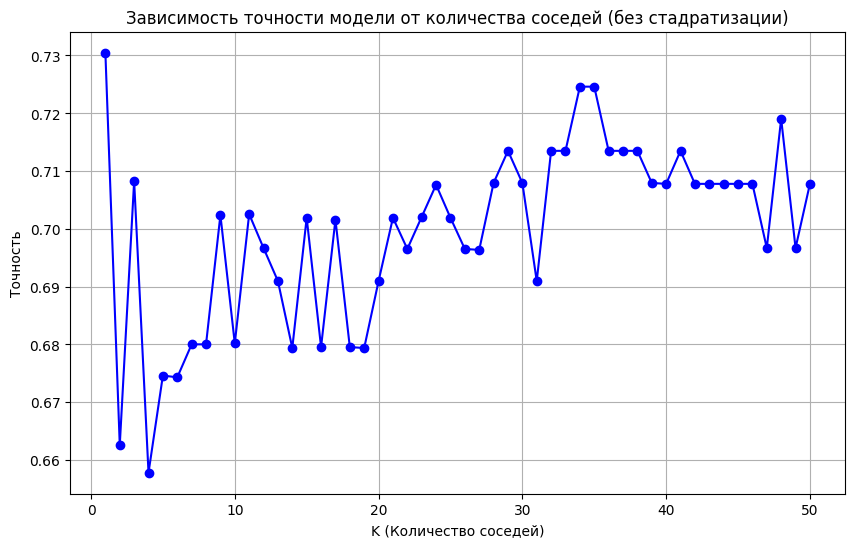

In [ ]:
# строим график

k_values = list(accuracy_dict.keys())
accuracy_values = list(accuracy_dict.values())

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-', color='b')
plt.title('Зависимость точности модели от количества соседей (без стадратизации)')
plt.xlabel('K (Количество соседей)')
plt.ylabel('Точность')
plt.grid(True)
plt.show()

5. Произведите масштабирование признаков с помощью функции sklearn.preprocessing.scale. Снова найдите оптимальное k на кроссвалидации.
6. Какое значение k получилось оптимальным после приведения признаков к одному масштабу? Как изменилось значение качества? Приведите ответы на вопросы 3 и 4.

In [ ]:
# я буду использовать StandardScaler так как не понял, что делает scale
standard = StandardScaler()
standard.fit(X)
st_X = standard.transform(X)


In [ ]:
# повторяю действия из пункта 4

accuracy_dict = {} # словарь типа {k : точность}
for k in range(1, 51):
  accuracy_dict[k] = knn(k, st_X, y)

sorted_dict = dict(sorted(accuracy_dict.items(), key=lambda item: item[1], reverse=True))
best_k = next(iter(sorted_dict))
print("StandardScaler\n")
print(f"K = {best_k} с наилучшей точностью: {sorted_dict[best_k]}")

StandardScaler

K = 29 с наилучшей точностью: 0.9776190476190475


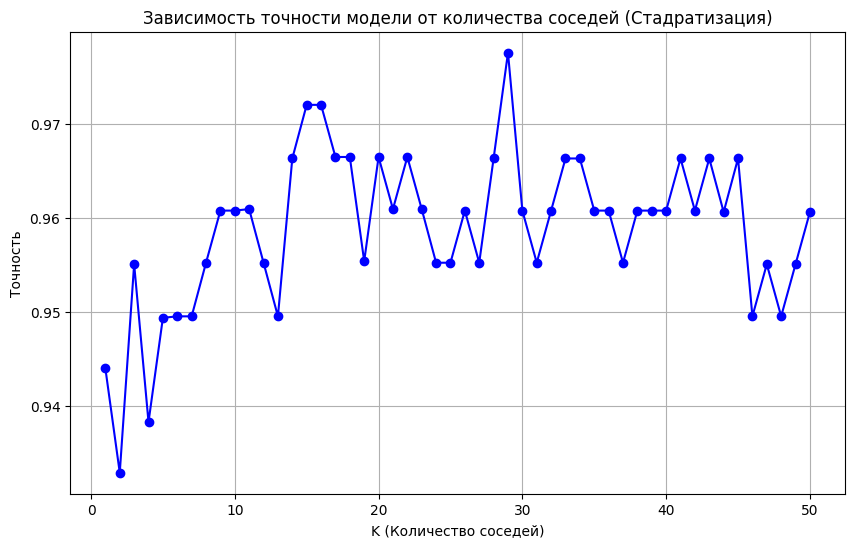

In [ ]:
# строим график

k_values = list(accuracy_dict.keys())
accuracy_values = list(accuracy_dict.values())

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-', color='b')
plt.title('Зависимость точности модели от количества соседей (Стадратизация)')
plt.xlabel('K (Количество соседей)')
plt.ylabel('Точность')
plt.grid(True)
plt.show()

Возьмите датасет из предыдущего задания (наличие диабета у женщин), определите оптимальное количество соседей в методе KNN, сравните оба метода (SVM, KNN), используя classification_report.

In [ ]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# svm
X = df.drop('Outcome', axis=1)
y = df['Outcome']
# сразу делаю стандартизацию
standard = StandardScaler()
standard.fit(X)
standard_X = standard.transform(X)
X_train, X_test, y_train, y_test = train_test_split(standard_X, y, test_size=0.3, random_state=42)

svm = SVC(kernel='linear')

# linear, rbf и poly никак не улучшают модель, я проверил, просто лень писать
# одно и то же

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print("SVM\n", classification_report(y_test, y_pred))

SVM
               precision    recall  f1-score   support

           0       0.76      0.90      0.83       151
           1       0.72      0.47      0.57        80

    accuracy                           0.75       231
   macro avg       0.74      0.69      0.70       231
weighted avg       0.75      0.75      0.74       231



In [ ]:
# knn

accuracy_dict = {} # словарь типа {k : точность}
for k in range(1, 51):
  accuracy_dict[k] = knn(k, X_train, y_train)

sorted_dict = dict(sorted(accuracy_dict.items(), key=lambda item: item[1], reverse=True))
best_k = next(iter(sorted_dict))
print("Метод ближ. соседей (датасет диабета)\n")
print(f"K = {best_k} с наилучшей точностью: {sorted_dict[best_k]}")

Метод ближ. соседей (датасет диабета)

K = 29 с наилучшей точностью: 0.7597438560055382


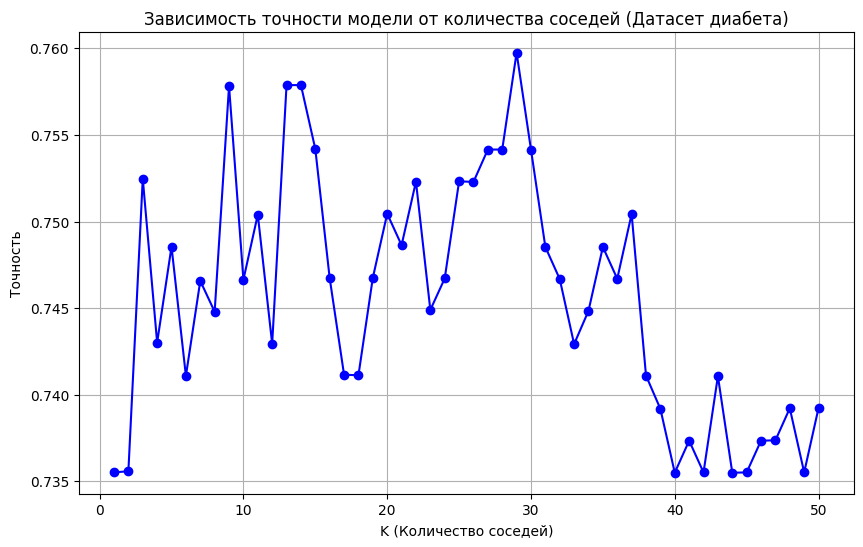

In [ ]:
k_values = list(accuracy_dict.keys())
accuracy_values = list(accuracy_dict.values())

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-', color='b')
plt.title('Зависимость точности модели от количества соседей (Датасет диабета)')
plt.xlabel('K (Количество соседей)')
plt.ylabel('Точность')
plt.grid(True)
plt.show()

In [ ]:
# зная лучшее значение k, создаём классификатор, указывая k = 29
model_knn = KNeighborsClassifier(n_neighbors=29)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
print("KNN\n", classification_report(y_test, y_pred_knn))

KNN
               precision    recall  f1-score   support

           0       0.76      0.86      0.81       151
           1       0.65      0.49      0.56        80

    accuracy                           0.73       231
   macro avg       0.71      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231



Вывод: метод к ближайших соседей немного хуже в работе с данным датасетом, нежели чем метод опорных векторов.